In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/AptOnly/Gangnam_Gu_Only.csv")

In [3]:
dfInfo = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/Data_Analysis/Reference.csv", 
                     index_col=0)

In [4]:
df

,kaptCode,bjdCode,Household_Num,Begin_Date,Heating_Method,House_Type,Elec_Con,Elev_Num,Park_Above,Park_Below
0,A13508012,1168010100,411,20140124.0,지역난방,아파트,단일계약,11.0,0.0,588.0
1,A13579501,1168010100,332,20060814.0,지역난방,아파트,종합계약,9.0,0.0,552.0
2,A13592604,1168010100,738,20060102.0,지역난방,아파트,단일계약,20.0,0.0,743.0
3,A13508009,1168010100,541,20060928.0,지역난방,아파트,단일계약,14.0,0.0,914.0
4,A13508004,1168010100,206,19980421.0,중앙난방,아파트,종합계약,5.0,48.0,160.0
...,...,...,...,...,...,...,...,...,...,...
171,A13527019,1168011800,384,19781226.0,지역난방,아파트,단일계약,18.0,59.0,355.0
172,A13527006,1168011800,247,19830611.0,중앙난방,아파트,단일계약,6.0,285.0,0.0
173,A10027319,1168011800,110,20160422.0,지역난방,아파트,종합계약,4.0,156.0,0.0
174,A13550404,1168011800,64,20020131.0,지역난방,아파트,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

kaptCode           0
bjdCode            0
Household_Num      0
Begin_Date         1
Heating_Method     1
House_Type         0
Elec_Con          12
Elev_Num          16
Park_Above        13
Park_Below        13
dtype: int64

<AxesSubplot: >

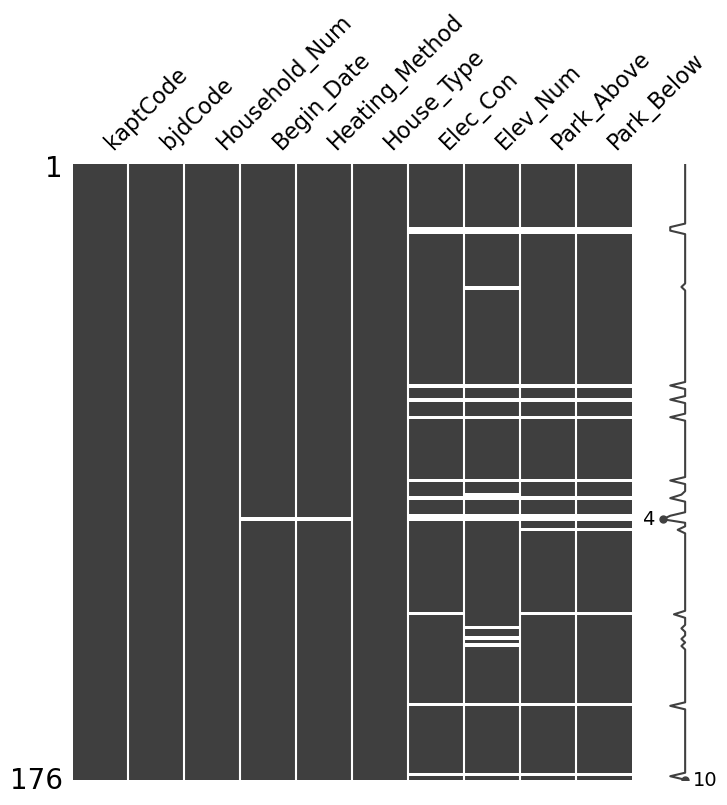

In [6]:
msno.matrix(df=df, figsize=(8, 8))

## Begin_Date

In [7]:
#null values
Begin_Date = df['Begin_Date']
print(f"There are {Begin_Date.isnull().sum()} null values, and they are located at \n{np.where(Begin_Date.isnull())[0]}")

There are 1 null values, and they are located at 
[101]


In [8]:
#Drop the null values and change date values to datetime
Begin_Date = df['Begin_Date'].dropna()
Begin_Date = pd.to_datetime(Begin_Date, format = '%Y%m%d')
print(Begin_Date)

0     2014-01-24
1     2006-08-14
2     2006-01-02
3     2006-09-28
4     1998-04-21
         ...    
171   1978-12-26
172   1983-06-11
173   2016-04-22
174   2002-01-31
175   1999-01-06
Name: Begin_Date, Length: 175, dtype: datetime64[ns]


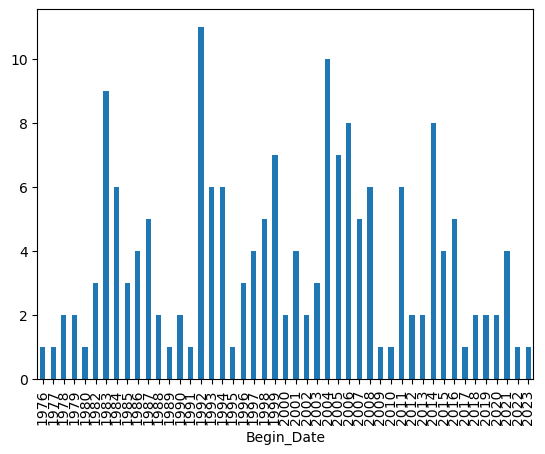

In [9]:
# distribution of years in Begin_Date
Begin_Date.groupby(Begin_Date.dt.year).count().plot(kind="bar")
plt.show()

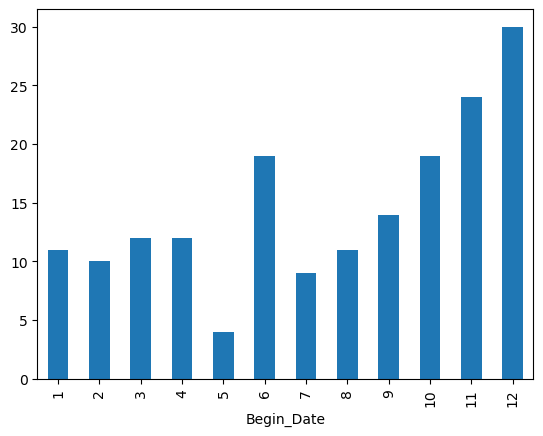

In [10]:
#Distribtion of months in Begin_Date(just for fun)
Begin_Date.groupby(Begin_Date.dt.month).count().plot(kind="bar")
plt.show()

## Household_Num

In [4]:
#1 null value
Household_Num = df['Household_Num']
print(f"There are {Household_Num.isnull().sum()} null values, and they are located at \n{np.where(Household_Num.isnull())[0]}")
display(Household_Num)

There are 0 null values, and they are located at 
[]


0      411
1      332
2      738
3      541
4      206
      ... 
171    384
172    247
173    110
174     64
175    132
Name: Household_Num, Length: 176, dtype: int64

In [5]:
Household_Num = Household_Num.dropna()
Household_Num = Household_Num.astype('int16')

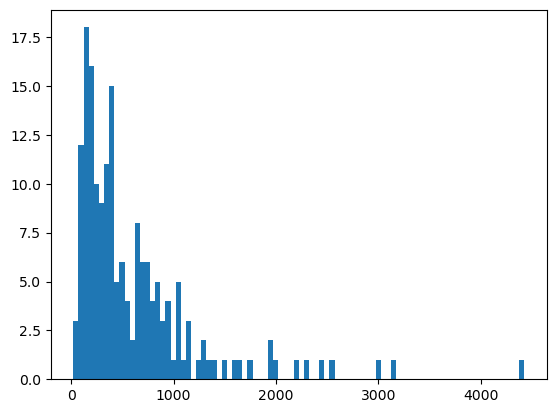

In [6]:
fig, ax = plt.subplots()
b = int(len(Household_Num)/2)
ax.hist(Household_Num, bins = b)
plt.show()

In [14]:
Household_Num.describe()

count     176.000000
mean      613.181818
std       630.190974
min        19.000000
25%       209.750000
50%       406.000000
75%       790.750000
max      4424.000000
Name: Household_Num, dtype: float64

In [15]:
def printApt (Column, df, dfInfo, maxmin = "max", ind= 0):
    if(maxmin == "max"):
        find = Column[Column == Column.max()].index[ind]
        print(df.loc[find])
        print(dfInfo[dfInfo['kaptCode'] == df.loc[find]['kaptCode']])
    elif(maxmin == "min"):
        find = Column[Column == Column.min()].index[ind]
        print(df.loc[find])
        print(dfInfo[dfInfo['kaptCode'] == df.loc[find]['kaptCode']])

In [16]:
printApt(Household_Num, df, dfInfo)

kaptCode           A13583507
bjdCode           1168010600
Household_Num           4424
Begin_Date        19790830.0
Heating_Method          지역난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                42.0
Park_Above            3021.0
Park_Below               0.0
Name: 82, dtype: object
     kaptCode Complex_Name
96  A13583507           은마


## Heating_Method

In [17]:
# null values
Heating_Method = df['Heating_Method']
print(f"There are {Heating_Method.isnull().sum()} null values, and they are located at \n{np.where(Heating_Method.isnull())[0]}")
display(Heating_Method)

There are 1 null values, and they are located at 
[101]


0      지역난방
1      지역난방
2      지역난방
3      지역난방
4      중앙난방
       ... 
171    지역난방
172    중앙난방
173    지역난방
174    지역난방
175    개별난방
Name: Heating_Method, Length: 176, dtype: object

In [18]:
Heating_Method = Heating_Method.dropna()

In [19]:
int_HM = pd.factorize(Heating_Method)[0]
ind_HM = pd.factorize(Heating_Method)[1]
print(int_HM)
print(ind_HM)

[0 0 0 0 1 2 0 0 0 0 0 0 2 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 2 0 2 0 2 0 0 2 0 2 0 2 2 2 2 0 0 0 2 0 2 2 0 0 2 2 2 0 2 0 2 0 2 2 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 2 2 2 0 0 0 2 2 0 2 2 2 0 2 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 0 0 2 2 2 2 0 0 0 0 0 2 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 1 0 0 2]
Index(['지역난방', '중앙난방', '개별난방'], dtype='object')


In [20]:
count_int_HM = pd.Series(int_HM).value_counts()
count_int_HM

0    120
2     51
1      4
dtype: int64

In [21]:
eng_ind_HM = ['Regional','Central','Individual']

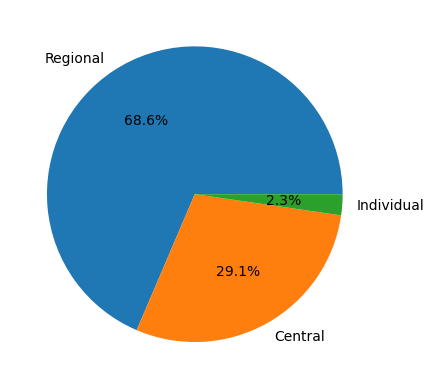

In [22]:
fig, ax = plt.subplots()
ax.pie(count_int_HM, labels=eng_ind_HM, autopct='%1.1f%%')
plt.show()

## Elev_Num; Elevator Number

In [7]:
Elev_Num = df['Elev_Num']
print(f"There are {Elev_Num.isnull().sum()} null values, and they are located at \n{np.where(Elev_Num.isnull())[0]}")

There are 16 null values, and they are located at 
[ 18  19  35  63  67  72  90  94  95 100 101 132 135 137 154 174]


In [8]:
Elev_Num = Elev_Num.dropna()
Elev_Num = Elev_Num.astype('int16')

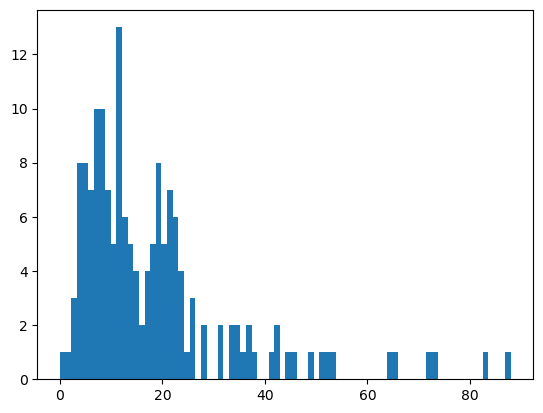

In [9]:
fig, ax = plt.subplots()
b = int(len(Elev_Num)/2)
ax.hist(Elev_Num, bins = b)
plt.show()

In [26]:
Elev_Num.describe()

count    160.000000
mean      18.350000
std       15.801919
min        0.000000
25%        8.000000
50%       14.000000
75%       22.000000
max       88.000000
Name: Elev_Num, dtype: float64

In [27]:
printApt(Elev_Num, df, dfInfo)

kaptCode           A13589802
bjdCode           1168011000
Household_Num           3130
Begin_Date        19760607.0
Heating_Method          지역난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                88.0
Park_Above            2350.0
Park_Below               0.0
Name: 107, dtype: object
      kaptCode Complex_Name
128  A13589802     압구정현대아파트


## Electricity Contract; Elec_Con

In [28]:
Elec_Con = df['Elec_Con']
print(f"There are {Elec_Con.isnull().sum()} null values, and they are located at \n{np.where(Elec_Con.isnull())[0]}")

There are 12 null values, and they are located at 
[ 18  19  63  67  72  90  95 100 101 128 154 174]


In [29]:
Elec_Con = Elec_Con.dropna()

In [30]:
int_EC = pd.factorize(Elec_Con)[0]
ind_EC = pd.factorize(Elec_Con)[1]
print(int_EC)
print(ind_EC)

[0 1 0 0 1 2 1 0 1 0 0 1 1 0 1 1 1 1 0 2 0 0 0 0 2 0 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1
 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 2 2 0 0 2 0 2 1 1 1 1 0 0
 1 0 0 0 0 0 0 1 0 0 2 0 0 0 1 2]
Index(['단일계약', '종합계약', '기타'], dtype='object')


In [31]:
count_int_EC = pd.Series(int_EC).value_counts()
count_int_EC

0    88
1    67
2     9
dtype: int64

In [32]:
eng_ind_EC = ['Single', 'Comprehensive', 'Other']

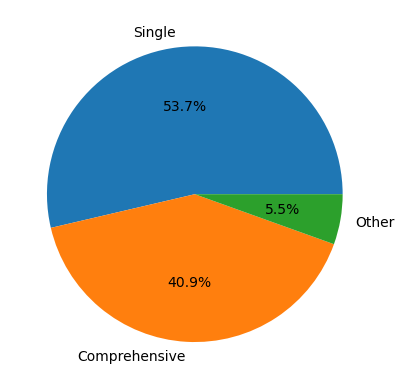

In [33]:
fig, ax = plt.subplots()
ax.pie(count_int_EC, labels=eng_ind_EC, autopct='%1.1f%%')
plt.show()

## Park_Above & Park_Below

In [10]:
Park_Above = df['Park_Above']
Park_Below = df['Park_Below']
print(f"There are {Park_Above.isnull().sum()} null values, and they are located at \n{np.where(Park_Above.isnull())[0]}")
print(f"There are {Park_Below.isnull().sum()} null values, and they are located at \n{np.where(Park_Below.isnull())[0]}")

There are 13 null values, and they are located at 
[ 18  19  63  67  72  90  95 100 101 104 128 154 174]
There are 13 null values, and they are located at 
[ 18  19  63  67  72  90  95 100 101 104 128 154 174]


In [11]:
Park_Above = Park_Above.dropna().astype('int16')
Park_Below = Park_Below.dropna().astype('int16')
display(Park_Above)
display(Park_Below)

0        0
1        0
2        0
3        0
4       48
      ... 
170    330
171     59
172    285
173    156
175      7
Name: Park_Above, Length: 163, dtype: int16

0      588
1      552
2      743
3      914
4      160
      ... 
170      0
171    355
172      0
173      0
175     87
Name: Park_Below, Length: 163, dtype: int16

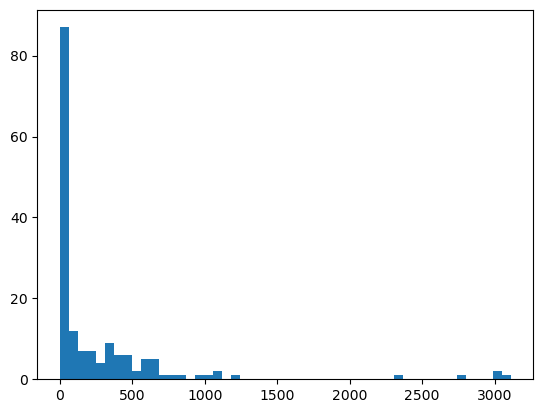

In [12]:
fig, ax = plt.subplots()
b = int(len(Park_Above)/2)
ax.hist(Park_Above, bins = 50)
plt.show()

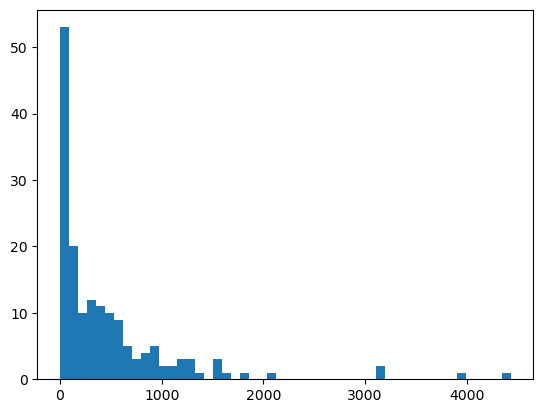

In [13]:
fig, ax = plt.subplots()
b = int(len(Park_Below)/2)
ax.hist(Park_Below, bins = 50)
plt.show()

In [38]:
Park_Above.describe()

count     163.000000
mean      266.073620
std       533.068644
min         0.000000
25%         0.000000
50%        53.000000
75%       337.500000
max      3113.000000
Name: Park_Above, dtype: float64

In [39]:
Park_Below.describe()

count     163.000000
mean      461.607362
std       674.046692
min         0.000000
25%         0.000000
50%       250.000000
75%       592.000000
max      4435.000000
Name: Park_Below, dtype: float64

In [40]:
printApt(Park_Above, df, dfInfo)

kaptCode           A10024216
bjdCode           1168011400
Household_Num           1996
Begin_Date        20210730.0
Heating_Method          지역난방
House_Type               아파트
Elec_Con                종합계약
Elev_Num                49.0
Park_Above            3113.0
Park_Below               0.0
Name: 144, dtype: object
      kaptCode Complex_Name
168  A10024216   디에이치 자이 개포


In [41]:
printApt(Park_Below, df, dfInfo)

kaptCode           A13527203
bjdCode           1168011800
Household_Num           3002
Begin_Date        20060127.0
Heating_Method          지역난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                64.0
Park_Above               0.0
Park_Below            4435.0
Name: 162, dtype: object
      kaptCode Complex_Name
191  A13527203         도곡렉슬
